<a href="https://colab.research.google.com/github/lubsanovdmitry/mong-ocr-materials/blob/main/notebooks/Bench.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install evaluate
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 10.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found e

In [ ]:
from pandas import DataFrame
import pandas as pd
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import numpy as np
from torch.utils.data import Dataset
import evaluate
from tqdm import tqdm

In [ ]:
#!gdown --fuzzy 1CVgIqbr5P2jULIH_h_D9R6H7MQWxeUzD
!gdown --fuzzy https://drive.google.com/file/d/1GNMebTrNzX_hUvB6ku7qjTM_7hErP_hP/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1GNMebTrNzX_hUvB6ku7qjTM_7hErP_hP
To: /content/test2.zip
100% 5.26M/5.26M [00:00<00:00, 57.9MB/s]


In [ ]:
!unzip -q test2.zip

In [ ]:
df = pd.read_csv("/content/test2/labels.txt", sep='|', header=None)

In [ ]:
df

,0,1
0,0.jpg,ᠭᠦᠷᠪᠡᠯ ᠴᠦᠭᠡᠷᠡᠭᠦᠯᠬᠦ
1,1.jpg,ᠲᠡᠯᠢᠭᠩ ᠬᠤᠷᠬᠢᠨᠠᠭ
2,2.jpg,ᠬᠥᠯᠭᠡᠨ ᠨᠢᠭᠤᠵᠤ ᠴᠠᠭᠠᠨ
3,3.jpg,ᠳ᠋ᠢᠶᠧᠽᠢ ᠬᠦᠮᠦᠨ ᠳᠣᠮᠳᠢ
4,4.jpg,ᠠᠭᠤᠰᠠᠶ᠎ᠠ ᠵᠢᠭᠢᠷᠢᠭᠪᠴᠢᠯᠡ
...,...,...
495,495.jpg,ᠬᠤᠪᠢᠯᠤᠭᠤᠯᠬᠤ
496,496.jpg,ᠠᠮᠲᠠᠯᠠᠬᠤ
497,497.jpg,ᠤᠯᠠᠷᠢᠯ ᠰᠣᠨᠣᠰᠤᠶ᠎ᠠ
498,498.jpg,ᠴᠢ


In [ ]:
!gdown --fuzzy https://drive.google.com/drive/folders/1smnY1zSq2U5nU20b3yv5ioxsszBaCc4W?usp=drive_link -O /content/trocr-mon-mong --folder

Retrieving folder contents
Processing file 1-Fnl_q-_TTSQ1oNULtsGd0U4C-xmpOuF config.json
Processing file 1-9Sig-jvYSYygowPrTFwwpZBBKkyZv-w generation_config.json
Processing file 1-HvrF6YHoS44xQyWOoQtyuNhHJ6ipuaE model.safetensors
Processing file 1-LEW19qkxLpCKKyjGa6YlgSq75DDLfTz preprocessor_config.json
Processing file 1-IFP6-NH6xOJlOirhN56adLsWLLFbvR- training_args.bin
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1-Fnl_q-_TTSQ1oNULtsGd0U4C-xmpOuF
To: /content/trocr-mon-mong/config.json
100% 4.78k/4.78k [00:00<00:00, 11.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-9Sig-jvYSYygowPrTFwwpZBBKkyZv-w
To: /content/trocr-mon-mong/generation_config.json
100% 251/251 [00:00<00:00, 742kB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-HvrF6YHoS44xQyWOoQtyuNhHJ6ipuaE
From (redirected): https://drive.google.com/uc?id=1-HvrF6YHoS44xQyWOoQtyuNhHJ6ipuaE&c

In [ ]:
processor = TrOCRProcessor.from_pretrained("dalubsanov/trocr-mon-mong", revision="224")
model = VisionEncoderDecoderModel.from_pretrained("trocr-mon-mong")
model.config.max_length = 10
model.config.early_stopping = True
model.config.no_repeat_ngram_size = 3
model.config.length_penalty = 2.0
model.config.num_beams = 4

preprocessor_config.json:   0%|          | 0.00/325 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.22k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.44M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.12M [00:00<?, ?B/s]

In [ ]:
class CustomOCRBenchDataset(Dataset):
    def __init__(self, root_dir, df):
        self.root_dir = root_dir
        self.df = df

    def __len__(self):
        return len(self.df)-1


    def __getitem__(self, idx):
        # The image file name.
        file_name = self.df[0][idx]
        # The text (label).
        text = self.df[1][idx]
        # Read the image, apply augmentations, and get the transformed pixels.
        image = Image.open(self.root_dir + file_name).convert('RGB')
        # Rotate for "kek" dataset
        image = image.rotate(270, Image.NEAREST, expand = 1)

        encoding = {"pixel_values": image, "labels": text}
        return encoding

In [ ]:
cdr = CustomOCRBenchDataset('test2/', df)

In [ ]:
len(cdr)

499

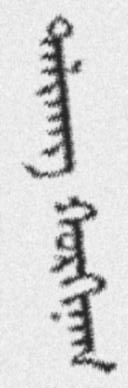

In [ ]:
display(cdr[1]['pixel_values'])

In [ ]:
cer = evaluate.load("cer")
wer = evaluate.load("wer")
f1 = evaluate.load("f1")

In [ ]:
pred = []
refs = []

for dat in tqdm(cdr):
  text = dat['labels']
  img = dat['pixel_values']

  pixel_values = processor(img, return_tensors="pt").pixel_values

  generated_ids = model.generate(pixel_values)
  refs.append(text)
  pred.append(processor.batch_decode(generated_ids, skip_special_tokens=True)[0])

500it [12:19,  1.48s/it]


KeyError: 500

In [ ]:
cer_score = cer.compute(predictions=pred, references=refs)
print(cer_score)

0.10941846602198967


In [ ]:
pred

['ᠬᠦᠷᠡᠪᠡᠯ ᠴᠦᠭᠡᠷᠬᠡᠭᠦᠯᠬᠦ',
 'ᠳᠠᠯᠢᠩ ᠬᠤᠷᠬᠢᠨᠠᠭ',
 'ᠬᠦᠯᠬᠡᠨ ᠨᠢᠭᠤᠵᠤ ᠴᠠᠭᠠᠨ',
 'ᠳ᠋ᠢᠶᠧᠽᠢ ᠬᠦᠮᠦᠨ ᠳᠣᠮᠳᠢ',
 'ᠠᠭᠤᠰᠠᠶ\u180eᠠ ᠵᠢᠭᠢᠷᠢᠭᠪᠴᠢᠯᠡ',
 'ᠶᠠᠭᠠᠬᠢᠭᠠᠳ ᠴᠡᠴᠡᠭᠡᠨ ᠶᠠᠪᠤᠬᠤ',
 'ᠬᠦᠮᠦᠨ\u202fᠦ ᠰᠠᠶᠢᠬᠠᠨ\u202fᠳᠤ',
 'ᠴᠡᠯᠮᠡᠭ ᠳ᠋ᠠ ᠨᠢᠳᠦᠨ\u202fᠳᠦ\u202fᠪᠡᠨ',
 'ᠰᠢᠪᠡᠷᠡᠭᠡ\u202fᠳᠦ ᠴᠢᠭᠢ ᠨᠢ',
 '᠁',
 'ᠥᠭᠦᠢ\u202fᠳᠦ',
 'ᠵᠢᠭᠢᠷᠢᠭᠪᠴᠢ ᠶᠠᠭᠤᠮᠡᠨ ᠮᠢᠨᠢ',
 'ᠦᠯᠡᠳᠡᠭᠡ ᠵᠢᠭᠦᠷ',
 'ᠰᠡᠷᠡᠭᠡ',
 'ᠨᠢ ᠠᠮᠫᠧᠷᠮᠧᠲ᠋ᠷ ᠳᠡᠮ',
 'ᠶᠠᠭᠠᠷᠮᠠᠭ ᠶᠠᠽᠧᠢ',
 'ᠳᠠᠯᠠᠢ\u202fᠲᠠᠢ ᠤᠶᠠᠬᠠᠨ ᠪᠣᠷᠣᠭ\u180eᠠ',
 'ᠣᠭᠰᠢᠳᠠᠭᠤᠯᠬᠤ',
 'ᠵᠣᠷᠢᠬᠣ ᠬᠦᠮᠦᠨ',
 'ᠴᠣᠭᠣᠯᠲᠤᠷ ᠤᠯᠴᠢᠭᠠᠳ ᠨᠠᠪᠴᠢᠰ',
 'ᠴᠡᠵᠡᠭᠡᠷᠳᠡᠭᠦᠦ',
 'ᠬᠡᠦᠬᠡᠳ ᠲᠡᠨᠳᠡ\u202fᠡᠴᠡ',
 'ᠪᠠᠶᠢᠬᠤ ᠪᠦᠬᠦᠨ\u202fᠢᠶᠡᠨ ᠬᠠᠳᠠᠯᠤᠷ',
 'ᠳ᠋ᠠᠬᠢᠨ ᠬᠥᠨᠳᠥᠰᠥᠷᠳᠡᠢ',
 'ᠪᠠᠶᠢᠨ\u180eᠠ',
 'ᠴᠠᠭᠠᠨ ᠪᠦᠯᠢᠶᠡᠨ ᠨᠢ',
 'ᠵᠢᠭᠠᠬᠠᠨ ᠰᠠᠶᠢᠨ',
 'ᠴᠠᠯᠢᠩ\u202fᠠᠴᠠ ᠭᠡᠯ\u180eᠡ ᠷᠧᠫ',
 'ᠨᠢᠭᠡᠴᠡ ᠨᠢᠭᠡ ᠴᠢᠨᠢ',
 'ᠢᠷᠡᠲᠡᠯ\u180eᠡ ᠵᠥᠭᠡᠯᠡᠨ',
 'ᠪᠦᠰᠡᠭᠦᠢ ᠨᠢᠭᠡᠨᠲᠡ',
 'ᠪᠢ\u202fᠪᠡᠷ ᠳᠠᠪᠲᠠᠢ',
 'ᠳᠡᠭᠳᠡᠯᠵᠡᠬᠦ',
 'ᠮᠢᠨᠢ ᠰᠢᠭ',
 'ᠭᠠᠳᠠᠷᠯᠠᠭᠤᠯ ᠲᠥᠯᠥᠭᠡ ᠵᠠᠯᠠᠭᠤ',
 'ᠱᠣᠪᠲᠣᠭᠠᠷᠳᠠ ᠢᠷᠣᠯᠠᠬᠤ',
 'ᠬᠥᠩᠭᠡᠨ ᠭᠠᠷᠭᠠᠭᠳᠠᠬᠤ',
 'ᠳᠤᠷᠠᠲᠠᠢ ᠬᠣᠣᠰᠯᠠᠨ ᠴᠢᠮᠠᠷᠠᠤ\u202fᠶᠢ\u202fᠪᠠᠨ',
 'ᠮᠢᠨᠦ᠋ᠲ ᠰᠠᠭᠤᠭᠠᠳ',
 'ᠪᠠᠶᠢᠵᠠᠨᠠᠭᠤᠯ ᠣᠷᠴᠢᠯᠠᠩ ᠠᠷᠤ\u202fᠳᠤ',
 'ᠬᠢᠷᠰᠠᠨ ᠪᠦᠷᠢ\u202fᠶᠢᠨ',
 'ᠪᠢᠳᠡ ᠪᠠᠶᠢᠵᠤ ᠰᠠᠨᠠᠭ

test1.zip: cer 52%, wer 80%

test2.zip: cer 50|%, wer 80%

test2.zip on ft: 44%, wer 85%.

test2.zip on ft2: 14%, 33%.

0,1; 0,28


In [ ]:
wer_score = wer.compute(predictions=pred, references=refs)
print(wer_score)

0.27964426877470355


In [ ]:
image = Image.open('/content/lyrics-61724.png').convert('RGB')
display(image)
pixel_values = processor(img, return_tensors="pt").pixel_values

generated_ids = model.generate(pixel_values)
print(processor.batch_decode(generated_ids, skip_special_tokens=True)[0])